# Stochastic Gradient Descent
In DL, the objective function is usually the average of the loss functions for each examples in the training dataset. Given a training dataset of n examples, we assume that $f_i(\mathbf{x})$ is the loss function with respect to the training example of index $i$, where $\mathbf{x}$ is the parameter vector. Then we arrive at the objective function:

$$
f(\mathbf{x}) = \frac{1}{n}\sum^n_{i=1}f_i(\mathbf{x})
$$

The gradient of the objective function at $\mathbf{x}$ is :

$$
\nabla f(\mathbf{x}) = \frac{1}{n}\sum^n_{i=1}\nabla f_i(\mathbf{x})
$$

If gradient descent is used, the computational cost for each independent variable iteration is $\mathcal{O}(n)$, which grows linearly with n. Therefore, when the training dataset is larger, the cost of gradient descent for each iteration will be higher.
Stochastic gradient descent (SGD) reduces the computational cost of each iteration. At each iteration of stochastic gradient descent, we uniformly sample an index $i \in \{1, .., n\}$ for data examples at random, and compute the gradient $\nabla f_i(\mathbf{x})$ to update $\mathbf{x}$:

$$
\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f_i(\mathbf{x})
$$

where $\eta$ is the learning rate. In addition, the stochastic gradient $\nabla f_i(\mathbf{x})$ is an unbiased estimate of the full gradient $\nabla f(\mathbf{x})$ as
$$
\mathbb{E}_i\nabla f(\mathbf{x}) = \frac{1}{n}\sum_{i=1}^n\nabla f_i(\mathbf{x}) = \nabla f(\mathbf{x})
$$
This means that, on average, the stochastic gradient is a good estimate of the gradient.
Now, we will compare it with gradient descent by adding random noise with a mean of 0 and a variance of 1 to the gradient to simulate an SGD

In [5]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

f = lambda x1, x2: x1 ** 2 + 2 * x2 ** 2
f_grad = lambda x1, x2: (2 * x1, 4 * x2)
eta = 0.1

def constant_lr():
    return 1

lr = constant_lr

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    g1 += torch.normal(0.0, 1.0, (1, )).item()
    g2 += torch.normal(0.0, 1, (1, )).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

epoch 50, x1: -0.147155, x2: 0.087382


D:\anaconda\envs\d2l\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


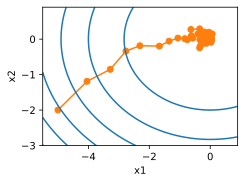

In [6]:
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

As we can see in this fig, the trajectory of the variables in the stochastic gradient descent is much more noisy than the one we observed in gradient descent in section 11.3. This is due to the stochastic injecting unstable factors into the gradient, even though we have close to the minima. There is a only way for us to counter those effects, that is use the dynamic learning rate.
## Dynamic Learning Rate
Replacing $\eta$ with a time-dependent learning rate $\eta(t)$ adds to the complexity of controlling convergence of an optimization algorithm. The following formulas are few basic strategy they are used in adjusting $\eta$ over time:
\begin{equation}
\eta (t) &= \eta_i \quad if \quad t_i \leq t \leq t_{i+1} \\
\eta (t) &= \eta_0 \cdot e^{-\lambda t}  \\
\eta (t) &= \eta_0 \cdot (\beta t + 1)^{-\alpha}
\end{equation}
The first called piecewise constant. It is a common strategy for training deep network. The second one called exponential decay. This is an aggressive algorithm, and it often leads to premature stopping before the algorithm has converged. The third one is the most popular one, which is named polynomial decay. We often set the $\alpha = 0.5$

epoch 1000, x1: -0.852428, x2: -0.075904


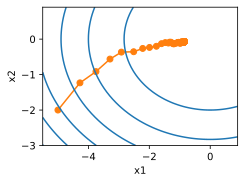

In [7]:
def exponential_lr():
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

As expected, the variance in the parameters is significantly reduced. However, this comes at the expense of failing to converge to the optimal solution $\mathbf{x} = (0, 0)$. Even after 1000 iteration steps are we are still far away from the optimal solution, and in fact, this algorithm fails to converge at all.

epoch 50, x1: -0.116458, x2: -0.010577


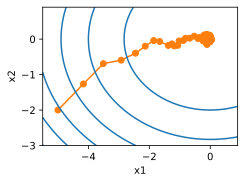

In [9]:
def polynomial_lr():
    global t
    t += 1
    return (1 + 0.1 * t) ** -0.5

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))